In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Leemos nuestro dataset que esta en un archivo xlsx que paso el cliente
dfVentasComple = pd.read_excel('../Ventas Mar-Ago.xlsx')

#hacemos drop de unas columnas que comentaron que no son necesarias agregar en lo mas minimo creando una array de las columnas a eliminar
dropColumns = ['SKU','Código de Barras','Lote','Caducidad del Lote','Estado','Entrega','Cajero','Vendedor','Caja','Sucursal','Canal']
dfVentasComple = dfVentasComple.drop(columns=dropColumns).reset_index()

#Ahora estandarizamos los datos de la fecha de las ventas del cliente pasandolo de un string a un formato de fecha
dfVentasComple['Fecha'] = pd.to_datetime(dfVentasComple['Fecha'])

#Aplicamos el redondeo a los valores de las columnas dejandolo solo en 2 decimales
dfVentasComple['Descuento'] = dfVentasComple['Descuento'].round(2)
dfVentasComple['Margen'] = dfVentasComple['Margen'].round(2)
dfVentasComple['Total'] = dfVentasComple['Total'].round(2)

#Cambiamos el nombre de una columna ya que no se entendia muy bien ya que es precio unitario es decir precio por cada pieza
dfVentasComple = dfVentasComple.rename(columns={'Precio Unitario': 'Precio de Venta'})

#Igualmente creamos 2 nuevas columnas dentro de nuestro set de datos el cual tendra el mes y año de la fecha de la venta que se realizo esto
#para un analisis todavia mas profundo de los datos.
dfVentasComple['Mes'] = dfVentasComple['Fecha'].dt.month
dfVentasComple['Año'] = dfVentasComple['Fecha'].dt.year

#En otro dataframe almacenamos los productos que sean de envio ya que esos no se tomaran para el analisis de las ventas si no como gastos
dfEnvios = dfVentasComple[dfVentasComple['Producto'] == 'Envio'].reset_index()

#Ahora ya que sacamos los envios en el mismo dataframe solo obtenemos las ventas que no sean envios para su analisis
dfVentasComple = dfVentasComple[dfVentasComple['Producto'] != 'Envio'].sort_values(by= 'Fecha', ascending = True).reset_index(drop=True)

#Obtenemos un valor que dentro de el set de datos que no estaba, este es el costo unitario por producto es decir lo que le cuesta cada
#producto unitariamente ya que el set de datos lo tiene todo junto
dfVentasComple['Costo Unitario'] = dfVentasComple['Costo'] / dfVentasComple['Cantidad']

#Reordenamos todo nuestro DF principal de las ventas para su mejor manipulacion y visualizacion
dfVentasComple = dfVentasComple[["index", "Número de Venta", "Fecha", "Mes", "Año", "Producto", "Categoria", "Marca",
         "Costo Unitario", "Cantidad", "Costo", "Subtotal", "Descuento",
         "Total", "Margen", "Cliente"]]

#Obtenemos un nuevo dataframe a peticion del cliente quitando las categorias suplementos (ya que estos son genericos y no les interesa saber su analisis)
#son propios de maquila solo interes suplementacion Americana (de importacion)
#este nuevo dataframe agrupado por año, mes y el PRODUCTO, sumando los valores de la cantidad, total y margen de cada una de el producto diferentes del DF
#ordenado por la producto y el mes de venta de forma ascendente cada una
dfVentasProductoMensual = dfVentasComple[dfVentasComple['Categoria'] != 'Suplementos']
dfVentasProductoMensual = (dfVentasProductoMensual.groupby(['Año','Mes','Producto'])[['Cantidad','Total','Margen']].sum()
    .sort_values(by= ['Producto','Mes'], ascending = [True,True])
    .reset_index())

#De nuestro DF de ventas por producto mensuales, lo ordenamos por año de menor a mayor, mes de mayor a menor y de Margen de mayor a menor, posteriormente
#agrupandolo por año y mes para poder obtener los primeros 3 registros es decir apoyados por el filtro las primeras 3 Productos con mayor MARGEN de
#cada uno de los meses
dfTop3ProductosVentas = (dfVentasProductoMensual.sort_values(["Año","Mes","Total"], ascending=[True,True,False])
    .groupby(["Año","Mes"]).head(3).reset_index(drop=True))

#Normalizamos a solo tener 2 decimales en el margen
dfTop3ProductosVentas['Total'] = dfTop3ProductosVentas['Total'].round(2)
dfTop3ProductosVentas

C:\Users\CESAR\AppData\Local\Temp\ipykernel_33484\3275110763.py:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfVentasComple['Fecha'] = pd.to_datetime(dfVentasComple['Fecha'])


,Año,Mes,Producto,Cantidad,Total,Margen
0,2025,3,Ashwaganda,59,14614.23,4714.23
1,2025,3,Tira de Mesoterapia Gentech Nutrition,16,2980.00,612.00
2,2025,3,BCAA Universal Nutrition,5,2300.00,675.00
3,2025,4,Ashwaganda,96,21060.00,9060.00
4,2025,4,Cafeina Anhidra Cellucor,11,4315.00,1290.00
5,2025,4,Mutivitaminicos Cellucor,5,2050.00,675.00
6,2025,5,Ashwaganda,81,19006.84,7306.84
7,2025,5,Colageno 400 mg HighTech Performance,6,6600.00,780.00
8,2025,5,Mutivitaminicos BSN,9,2800.00,640.00
9,2025,6,Ashwaganda,23,7960.00,4265.00


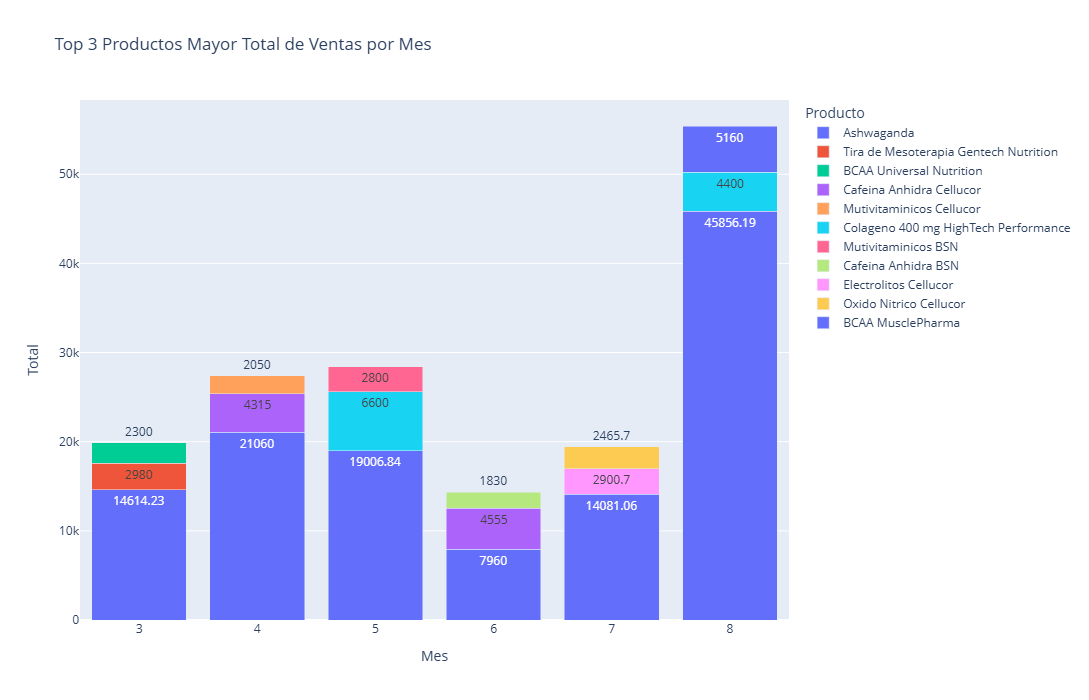

In [2]:
fig = px.bar(dfTop3ProductosVentas, x='Mes', y='Total', color='Producto',
             title="Top 3 Productos Mayor Total de Ventas por Mes",text='Total', height=700)
fig.update_layout(barmode='stack')
fig.show()